In [446]:
import numpy as np
import matplotlib.pyplot as plt


In [447]:
# Define the equation of state using pow function
def eos_pow(J, gamma, bulk_modulus):
    return bulk_modulus / gamma * (J**(-gamma) - 1.0)
    # return bulk_modulus / gamma * (pow(J,-gamma) - 1.0)

def eos_powm1(sJ, gamma, bulk_modulus):
    return bulk_modulus / gamma * (pow((1.0-sJ),-gamma) - 1.0)

# Define the equation of state using log1p, expm1, and 1-J
def eos_bonus(sJ, gamma, bulk_modulus):
    return (bulk_modulus / gamma) * (np.expm1(-gamma * np.log1p(-sJ)))


# Define the equation of state using taylor expansion
def eos_taylor(J, gamma, bulk_modulus):
    return bulk_modulus / gamma * (-gamma * np.log(J) + 0.5 * gamma * gamma * np.log(J) * np.log(J) - 1.0)

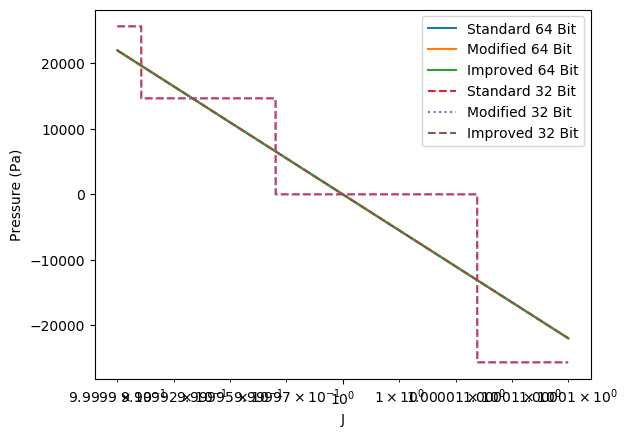

[ 25675.846  25675.846  25675.846 ... -25675.846 -25675.846 -25675.846]
[ 22000.008  21995.607  21991.207 ... -21991.191 -21995.592 -21999.99 ]


In [448]:
nPoints = 10000
# low  = 0.999999999999999999999999999999999
# high = 1.000000000000000000000000000000001
# diff = 0.000000000000000000000000000000001
low  = 0.9999999
high = 1.0000001
diff = 0.0000001
J_array_32 = np.linspace(low, high, nPoints, dtype=np.float32) 
J_array_64 = np.linspace(low, high, nPoints, dtype=np.float64) 
sJ_array_32 = np.linspace(diff, -diff, nPoints, dtype=np.float32) 
sJ_array_64 = np.linspace(diff, -diff, nPoints, dtype=np.float64) 
J_array_x = np.linspace(0.99999, 1.00001, nPoints, dtype=np.float64)
rho = 1000.0 # Density kg/m^3
bulk_modulus = 2.2e11 # Bulk modulus Pa
gamma = 7.15 # Gruneisen parameter

# Compute the pressure using the equation of state
pressure_pow_32 = eos_pow(J_array_32, gamma, bulk_modulus)
pressure_powm1_32 = eos_powm1(sJ_array_32, gamma, bulk_modulus)
pressure_log_32 = eos_bonus(sJ_array_32, gamma, bulk_modulus)

pressure_pow_64 = eos_pow(J_array_64, gamma, bulk_modulus)
pressure_powm1_64 = eos_powm1(sJ_array_64, gamma, bulk_modulus)
pressure_log_64 = eos_bonus(sJ_array_64, gamma, bulk_modulus)

#pressure_taylor = eos_taylor(J_array, gamma, bulk_modulus)

# Plot the pressure as a function of depth
plt.plot(J_array_x, pressure_pow_64, label='Standard 64 Bit')
plt.plot(J_array_x, pressure_powm1_64, label='Modified 64 Bit')
plt.plot(J_array_x, pressure_log_64, label='Improved 64 Bit')
plt.plot(J_array_x, pressure_pow_32, label='Standard 32 Bit', linestyle='--')
plt.plot(J_array_x, pressure_powm1_32, label='Modified 32 Bit', linestyle=':')
plt.plot(J_array_x, pressure_log_32, label='Improved 32 Bit', linestyle='--')

#plt.plot(J_array, pressure_taylor, label='taylor')
plt.xlabel('J')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.xscale('log')
#plt.yscale('symlog')
plt.show()

#print((sJ_array))
print(pressure_pow_32)
print(pressure_log_32)



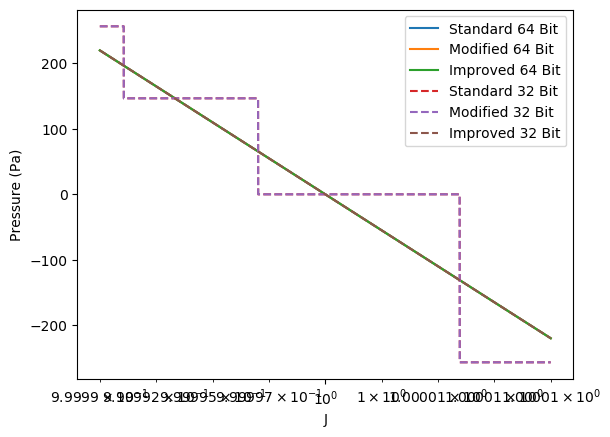

[ 256.75848  256.75848  256.75848 ... -256.75848 -256.75848 -256.75848]
[ 220.00009  219.95609  219.91208 ... -219.91193 -219.95593 -219.99992]


In [449]:


nPoints = 10000
# low  = 0.999999999999999999999999999999999
# high = 1.000000000000000000000000000000001
# diff = 0.000000000000000000000000000000001
low  = 0.9999999
high = 1.0000001
diff = 0.0000001
J_array_32 = np.linspace(low, high, nPoints, dtype=np.float32) 
J_array_64 = np.linspace(low, high, nPoints, dtype=np.float64) 
sJ_array_32 = np.linspace(diff, -diff, nPoints, dtype=np.float32) 
sJ_array_64 = np.linspace(diff, -diff, nPoints, dtype=np.float64) 
J_array_x = np.linspace(0.99999, 1.00001, nPoints, dtype=np.float64)
rho = 1000.0 # Density kg/m^3
bulk_modulus = 2.2e9 # Bulk modulus Pa
gamma = 7.15 # Gruneisen parameter

# Compute the pressure using the equation of state
pressure_pow_32 = eos_pow(J_array_32, gamma, bulk_modulus)
pressure_powm1_32 = eos_powm1(sJ_array_32, gamma, bulk_modulus)
pressure_log_32 = eos_bonus(sJ_array_32, gamma, bulk_modulus)

pressure_pow_64 = eos_pow(J_array_64, gamma, bulk_modulus)
pressure_powm1_64 = eos_powm1(sJ_array_64, gamma, bulk_modulus)
pressure_log_64 = eos_bonus(sJ_array_64, gamma, bulk_modulus)

#pressure_taylor = eos_taylor(J_array, gamma, bulk_modulus)

# Plot the pressure as a function of depth
plt.plot(J_array_x, pressure_pow_64, label='Standard 64 Bit')
plt.plot(J_array_x, pressure_powm1_64, label='Modified 64 Bit')
plt.plot(J_array_x, pressure_log_64, label='Improved 64 Bit')
plt.plot(J_array_x, pressure_pow_32, label='Standard 32 Bit', linestyle='--')
plt.plot(J_array_x, pressure_powm1_32, label='Modified 32 Bit', linestyle='--')
plt.plot(J_array_x, pressure_log_32, label='Improved 32 Bit', linestyle='--')

#plt.plot(J_array, pressure_taylor, label='taylor')
plt.xlabel('J')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.xscale('log')
#plt.yscale('symlog')
plt.show()

#print((sJ_array))
print(pressure_pow_32)
print(pressure_log_32)

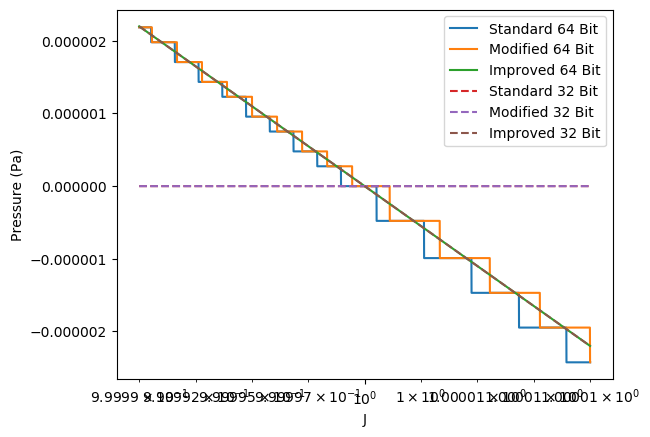

[0. 0. 0. ... 0. 0. 0.]
[ 2.2000002e-06  2.1995602e-06  2.1991202e-06 ... -2.1991202e-06
 -2.1995602e-06 -2.2000002e-06]


In [450]:

nPoints = 10000
# low  = 0.999999999999999999999999999999999
# high = 1.000000000000000000000000000000001
# diff = 0.000000000000000000000000000000001
low  = 0.999999999999999
high = 1.000000000000001
diff = 0.000000000000001
J_array_32 = np.linspace(low, high, nPoints, dtype=np.float32) 
J_array_64 = np.linspace(low, high, nPoints, dtype=np.float64) 
sJ_array_32 = np.linspace(diff, -diff, nPoints, dtype=np.float32) 
sJ_array_64 = np.linspace(diff, -diff, nPoints, dtype=np.float64) 
J_array_x = np.linspace(0.99999, 1.00001, nPoints, dtype=np.float64)
rho = 1000.0 # Density kg/m^3
bulk_modulus = 2.2e9 # Bulk modulus Pa
gamma = 7.15 # Gruneisen parameter

# Compute the pressure using the equation of state
pressure_pow_32 = eos_pow(J_array_32, gamma, bulk_modulus)
pressure_powm1_32 = eos_powm1(sJ_array_32, gamma, bulk_modulus)
pressure_log_32 = eos_bonus(sJ_array_32, gamma, bulk_modulus)

pressure_pow_64 = eos_pow(J_array_64, gamma, bulk_modulus)
pressure_powm1_64 = eos_powm1(sJ_array_64, gamma, bulk_modulus)
pressure_log_64 = eos_bonus(sJ_array_64, gamma, bulk_modulus)

#pressure_taylor = eos_taylor(J_array, gamma, bulk_modulus)

# Plot the pressure as a function of depth
plt.plot(J_array_x, pressure_pow_64, label='Standard 64 Bit')
plt.plot(J_array_x, pressure_powm1_64, label='Modified 64 Bit')
plt.plot(J_array_x, pressure_log_64, label='Improved 64 Bit')
plt.plot(J_array_x, pressure_pow_32, label='Standard 32 Bit', linestyle='--')
plt.plot(J_array_x, pressure_powm1_32, label='Modified 32 Bit', linestyle='--')
plt.plot(J_array_x, pressure_log_32, label='Improved 32 Bit', linestyle='--')

#plt.plot(J_array, pressure_taylor, label='taylor')
plt.xlabel('J')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.xscale('log')
#plt.yscale('symlog')
plt.show()

#print((sJ_array))
print(pressure_pow_32)
print(pressure_log_32)